In [1]:
#!pip install -q seaborn

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable

In [3]:
#Para correrlo en Google Colab se debe descargar el csv
#Top_panel_HISTORY_first_2_rows.csv que está en esta misma
#ruta y abrirlo con las siguientes lineas.
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv("Top_panel_HISTORY_first_2_rows.csv",
                 header=None)

In [5]:
df

0      1            2    \
0                                                NaN   year  1850.000000   
1                Cumulative CO2 emissions since 1850  GtCO2     2.668250   
2  Assessed global surface temperature relative t...     oC    -0.058676   

           3            4            5            6            7    \
0  1851.000000  1852.000000  1853.000000  1854.000000  1855.000000   
1     5.355922     8.070161    10.811831    13.602929    16.408693   
2     0.048824     0.078824     0.046324     0.048824     0.048824   

           8            9    ...          162          163          164  \
0  1856.000000  1857.000000  ...  2010.000000  2011.000000  2012.000000   
1    19.246167    22.107591  ...  2040.465059  2079.737316  2119.941147   
2    -0.051176    -0.146176  ...     0.996324     0.881324     0.906324   

           165          166          167          168          169  \
0  2013.000000  2014.000000  2015.000000  2016.000000  2017.000000   
1  2160.546995  2201.833044  2243.290895  2284.211198  2325.479230   
2     0.936324     1.006324     1.148824     1.263824     1.178824   

           170          171  
0  2018.000000  2019.000000  
1  2367.591916  2410.637538  
2     1.101324     1.226324  

[3 rows x 172 columns]

In [6]:
df2 = df.iloc[:,2:]

In [7]:
df2

2            3            4            5            6    \
0  1850.000000  1851.000000  1852.000000  1853.000000  1854.000000   
1     2.668250     5.355922     8.070161    10.811831    13.602929   
2    -0.058676     0.048824     0.078824     0.046324     0.048824   

           7            8            9            10           11   ...  \
0  1855.000000  1856.000000  1857.000000  1858.000000  1859.000000  ...   
1    16.408693    19.246167    22.107591    24.991498    27.903669  ...   
2     0.048824    -0.051176    -0.146176    -0.038676     0.068824  ...   

           162          163          164          165          166  \
0  2010.000000  2011.000000  2012.000000  2013.000000  2014.000000   
1  2040.465059  2079.737316  2119.941147  2160.546995  2201.833044   
2     0.996324     0.881324     0.906324     0.936324     1.006324   

           167          168          169          170          171  
0  2015.000000  2016.000000  2017.000000  2018.000000  2019.000000  
1  2243.290895  2284.211198  2325.479230  2367.591916  2410.637538  
2     1.148824     1.263824     1.178824     1.101324     1.226324  

[3 rows x 170 columns]

In [8]:
years = df2.iloc[0,:]

In [9]:
factor = 1/7.8

In [10]:
gtco2s = df2.iloc[1,:]

In [11]:
temperatures_nasa_all_file = pd.read_csv("global_temperature_from_nasa.csv")

In [12]:
temperatures_nasa = temperatures_nasa_all_file.iloc[:,1]

In [13]:
ppms = gtco2s*factor

In [14]:
idx = years >= 1960
idx2 = temperatures_nasa_all_file.iloc[:,0] >=1960

In [15]:
years_1960 = years[idx].reset_index(drop=True)
ppms_1960 = ppms[idx].reset_index(drop=True)
gtco2s_1960 = gtco2s[idx].reset_index(drop=True)


In [16]:
temperatures_nasa_1960 = temperatures_nasa[idx2]

In [17]:
plt.figure(figsize=(8,8))
plt.plot(years_1960, gtco2s_1960, '.')
plt.ylabel("Cumulative CO2 emissions since 1960 (GtCO2)")
plt.show()

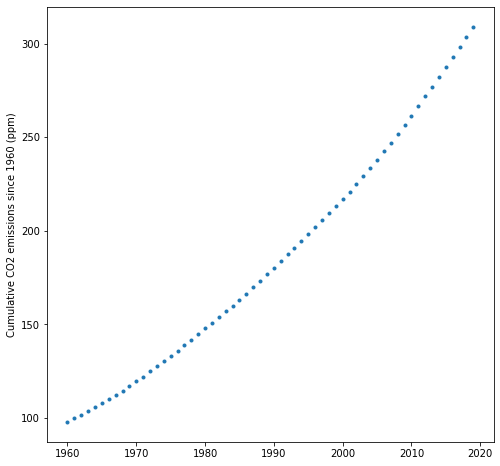

In [18]:
plt.figure(figsize=(8,8))
plt.plot(years_1960, ppms_1960, '.')
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)")
plt.show()

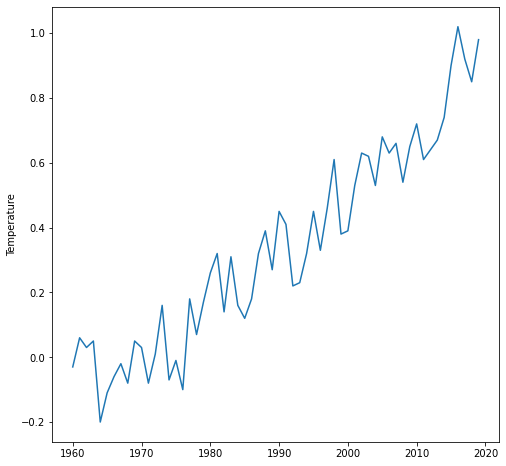

In [19]:
plt.figure(figsize=(8,8))
plt.plot(years_1960, temperatures_nasa_1960, '-')
plt.ylabel("Temperature")
plt.show()

In [20]:
temperatures_nasa_1960 = temperatures_nasa_1960.reset_index(drop=True)

In [21]:
df3 = pd.DataFrame({"years":       years_1960,
                   "temperatures": temperatures_nasa_1960})

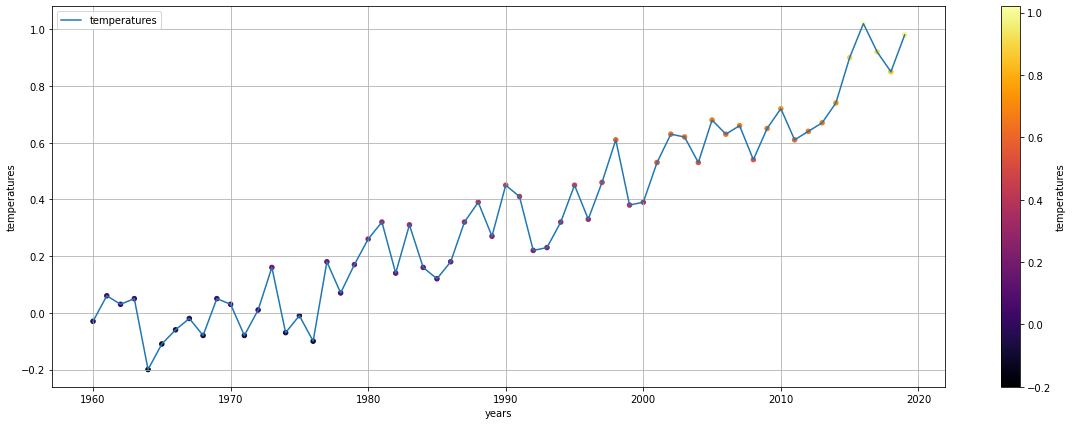

In [22]:
ax=df3.plot(x="years",y="temperatures")
df3.plot.scatter(x="years", y="temperatures",
                 c="temperatures",
                 colormap='inferno',figsize=(20,7),
                 ax=ax)
plt.grid()
plt.show()

In [23]:
data_color_normalized = [x / max(temperatures_nasa_1960) for x in temperatures_nasa_1960]

In [24]:
my_cmap = plt.cm.get_cmap('inferno')
colors = my_cmap(data_color_normalized)

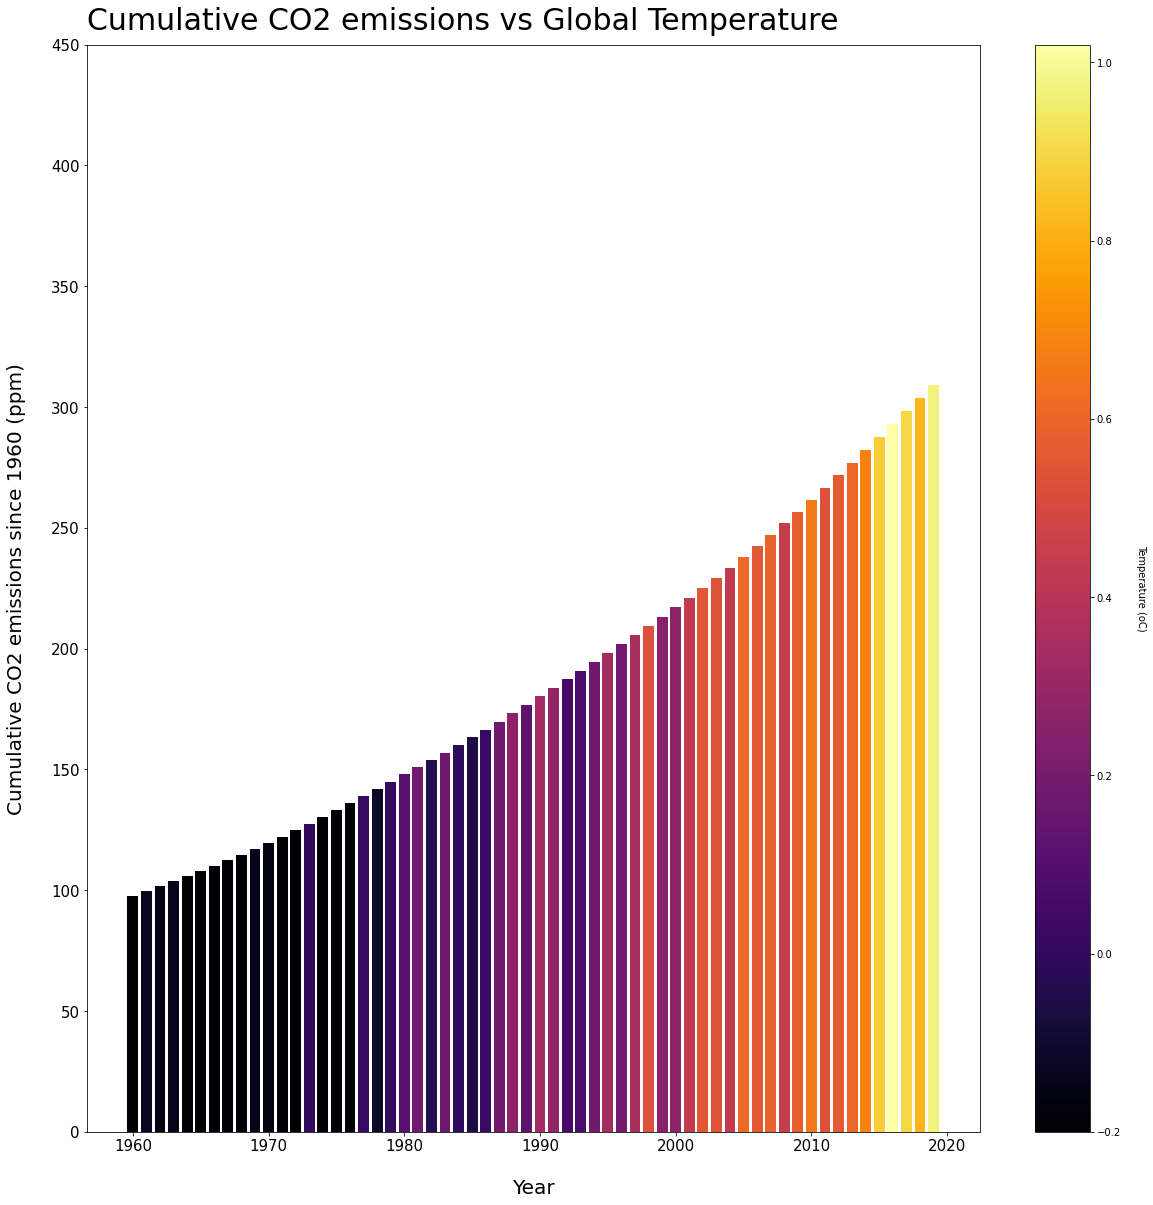

In [25]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, ppms_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(min(temperatures_nasa_1960),max(temperatures_nasa_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Temperature (oC)', rotation=270,labelpad=25)
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Cumulative CO2 emissions vs Global Temperature", fontsize=30, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,450))
plt.show()

In [26]:
temperatures_from_ipcc = df2.iloc[2,:]

In [27]:
temperatures_from_ipcc_1960 = temperatures_from_ipcc[idx]

In [28]:
data_color_normalized2 = [x / max(ppms_1960) for x in ppms_1960]
my_cmap2 = plt.cm.get_cmap('inferno')
colors2 = my_cmap2(data_color_normalized2)

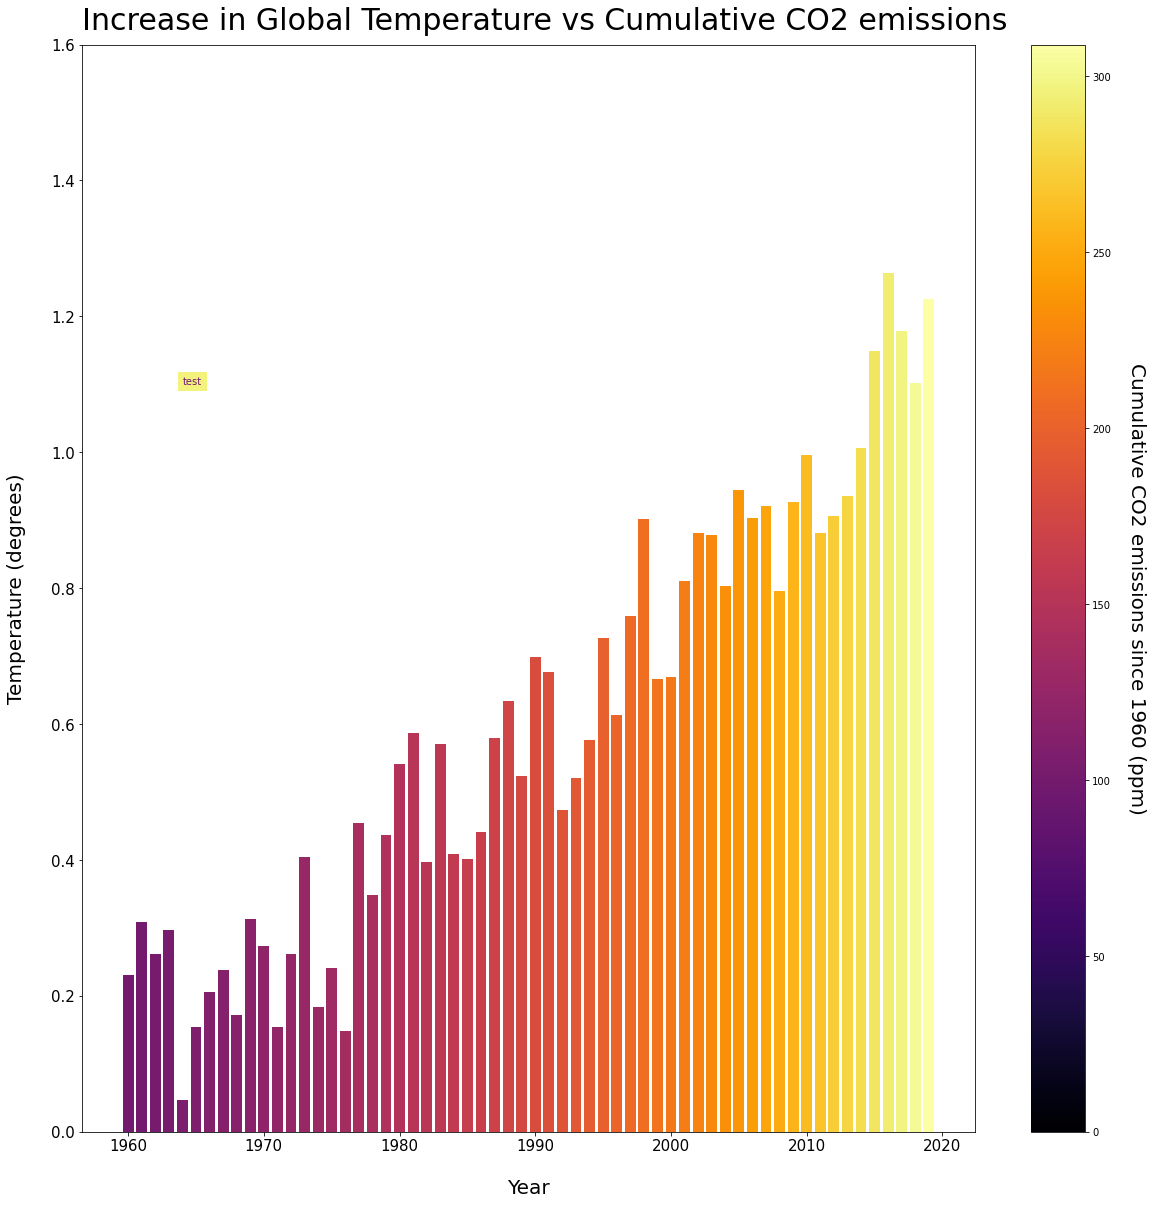

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_from_ipcc_1960, color=colors2)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Increase in Global Temperature vs Cumulative CO2 emissions", fontsize=30, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.text(1964, 1.1, 'test', color=colors[21], backgroundcolor=colors[len(colors)-1])
plt.ylim((0,1.6))
plt.show()

#**Categorías**
### A continuación se exponen los gráficos correspondientes a diferentes categorías de hitos y criterios. 

###**Acuerdos**
#### Los acuerdos a los que se ha llegado en la ventana de tiempo 1960-2022
* Montreal protocol (1987)
* Kyoto Protocol agreed (1997)
* The Kyoto Protocol becomes international law for those countries still inside it (2005)
* 192 governments convene for the UN climate summit in Copenhagen with expectations of a new global agreement high (09)
* Copenhagen Accord (09)
* COP 21 - Historical Paris Agreement adopted (15)
* US withdrawal from the Paris Agreement (17)
* US begins withdrawal from the Paris Agreement (19)
* Joe Biden signs an executive order that the USA re-enters into the Paris Agreement (21)
* President George W Bush removes the US from the Kyoto process (01)
* At the Earth Summit in Rio de Janeiro, governments agree the United Framework Convention on Climate Change. (92)
* Governments Adopt 'Katowice Climate Package' (18)

In [25]:
from matplotlib.colors import to_rgba

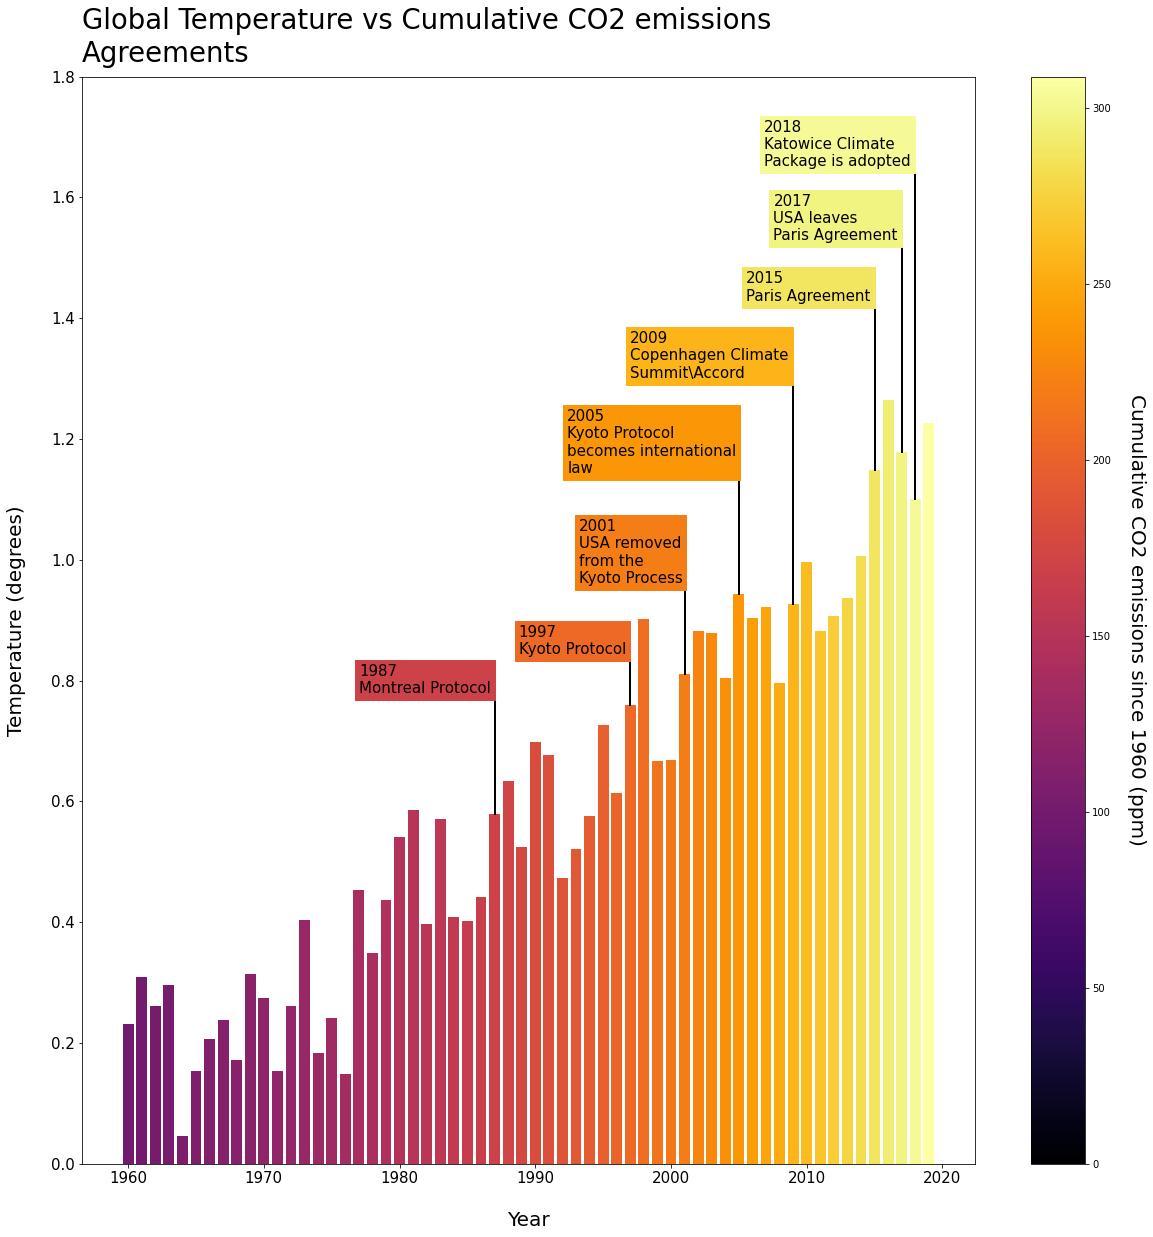

In [41]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_1960, color=colors2)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nAgreements", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(1987-10, temperatures_1960[139]+0.2, '1987\nMontreal Protocol', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[27],alpha=1))
plt.plot([1987, 1987], [temperatures_1960[139], temperatures_1960[139]+0.2], color='k', linestyle='-', linewidth=2)

ax.text(1997-8.23, temperatures_1960[149]+0.085, '1997\nKyoto Protocol', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[37],alpha=1))
plt.plot([1997, 1997], [temperatures_1960[149], temperatures_1960[149]+0.085], color='k', linestyle='-', linewidth=2)

ax.text(2009-12, temperatures_1960[161]+0.375, '2009\nCopenhagen Climate\nSummit\Accord', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[49],alpha=1))
plt.plot([2009, 2009], [temperatures_1960[161], temperatures_1960[161]+0.375], color='k', linestyle='-', linewidth=2)

ax.text(2005-12.65, temperatures_1960[157]+0.2, '2005\nKyoto Protocol\nbecomes international\nlaw', color='black', fontsize=15, backgroundcolor=colors2[45],alpha=1)
plt.plot([2005, 2005], [temperatures_1960[157], temperatures_1960[157]+0.2], color='k', linestyle='-', linewidth=2)

ax.text(2015-9.45, temperatures_1960[167]+0.28, '2015\nParis Agreement', color='black', fontsize=15, backgroundcolor=colors2[55],alpha=1)
plt.plot([2015, 2015], [temperatures_1960[167], temperatures_1960[167]+0.28], color='k', linestyle='-', linewidth=2)

ax.text(2017-9.45, temperatures_1960[169]+0.35, '2017\nUSA leaves\nParis Agreement', color='black', fontsize=15, backgroundcolor=colors2[57],alpha=1)
plt.plot([2017, 2017], [temperatures_1960[169], temperatures_1960[169]+0.35], color='k', linestyle='-', linewidth=2)

ax.text(2018-11.13, temperatures_1960[170]+0.55, '2018\nKatowice Climate\nPackage is adopted', color='black', fontsize=15, backgroundcolor=colors2[58],alpha=1)
plt.plot([2018, 2018], [temperatures_1960[170], temperatures_1960[170]+0.55], color='k', linestyle='-', linewidth=2)

ax.text(2001-7.8, temperatures_1960[153]+0.15, '2001\nUSA removed\nfrom the\nKyoto Process', color='black', fontsize=15, backgroundcolor=colors2[41],alpha=1)
plt.plot([2001, 2001], [temperatures_1960[153], temperatures_1960[153]+0.15], color='k', linestyle='-', linewidth=2)

plt.ylim((0,1.8))
plt.show()

In [ ]:
ppms_1960

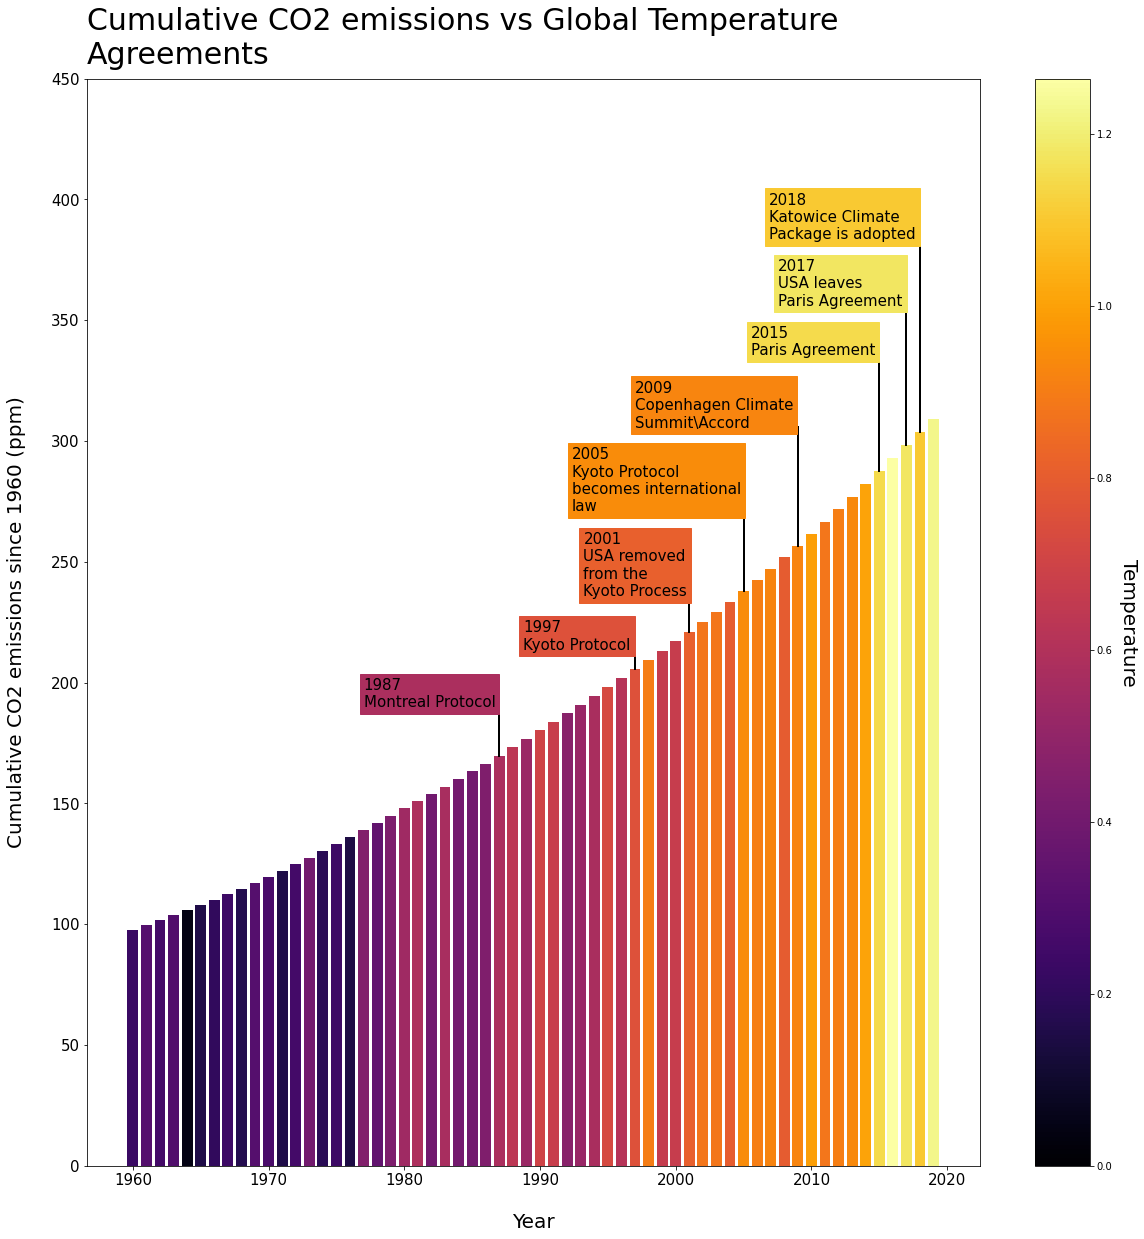

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, ppms_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(temperatures_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Temperature', rotation=270,labelpad=25,fontsize=20)
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Cumulative CO2 emissions vs Global Temperature\nAgreements", fontsize=30, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,450))

ax.text(1987-10, ppms_1960[139]+20, '1987\nMontreal Protocol', color='black', fontsize=15, backgroundcolor=to_rgba(colors[27],alpha=1))
plt.plot([1987, 1987], [ppms_1960[139], ppms_1960[139]+20], color='k', linestyle='-', linewidth=2)

ax.text(1997-8.23, ppms_1960[149]+8, '1997\nKyoto Protocol', color='black', fontsize=15, backgroundcolor=to_rgba(colors[37],alpha=1))
plt.plot([1997, 1997], [ppms_1960[149], ppms_1960[149]+8], color='k', linestyle='-', linewidth=2)

ax.text(2009-12, ppms_1960[161]+49, '2009\nCopenhagen Climate\nSummit\Accord', color='black', fontsize=15, backgroundcolor=to_rgba(colors[49],alpha=1))
plt.plot([2009, 2009], [ppms_1960[161], ppms_1960[161]+49], color='k', linestyle='-', linewidth=2)

ax.text(2005-12.65, ppms_1960[157]+33, '2005\nKyoto Protocol\nbecomes international\nlaw', color='black', fontsize=15, backgroundcolor=colors[45],alpha=1)
plt.plot([2005, 2005], [ppms_1960[157], ppms_1960[157]+33], color='k', linestyle='-', linewidth=2)

ax.text(2015-9.45, ppms_1960[167]+48, '2015\nParis Agreement', color='black', fontsize=15, backgroundcolor=colors[55],alpha=1)
plt.plot([2015, 2015], [ppms_1960[167], ppms_1960[167]+48], color='k', linestyle='-', linewidth=2)

ax.text(2017-9.45, ppms_1960[169]+58, '2017\nUSA leaves\nParis Agreement', color='black', fontsize=15, backgroundcolor=colors[57],alpha=1)
plt.plot([2017, 2017], [ppms_1960[169], ppms_1960[169]+58], color='k', linestyle='-', linewidth=2)

ax.text(2018-11.13, ppms_1960[170]+80, '2018\nKatowice Climate\nPackage is adopted', color='black', fontsize=15, backgroundcolor=colors[58],alpha=1)
plt.plot([2018, 2018], [ppms_1960[170], ppms_1960[170]+80], color='k', linestyle='-', linewidth=2)

ax.text(2001-7.8, ppms_1960[153]+15, '2001\nUSA removed\nfrom the\nKyoto Process', color='black', fontsize=15, backgroundcolor=colors[41],alpha=1)
plt.plot([2001, 2001], [ppms_1960[153], ppms_1960[153]+15], color='k', linestyle='-', linewidth=2)

plt.show()

###**Poblacion**
* A US President's Advisory Committee panel warns that the greenhouse effect is a matter of "real concern". (65)
* First UN environment conference (71)
* UK Prime Minister Margaret Thatcher calls for a global treaty on climate change. (89)
* UNFCCC Enters into Force (95)
* The UN summit in Mexico does not collapse (10)
* UN Secretary-General's Climate Summit (14)

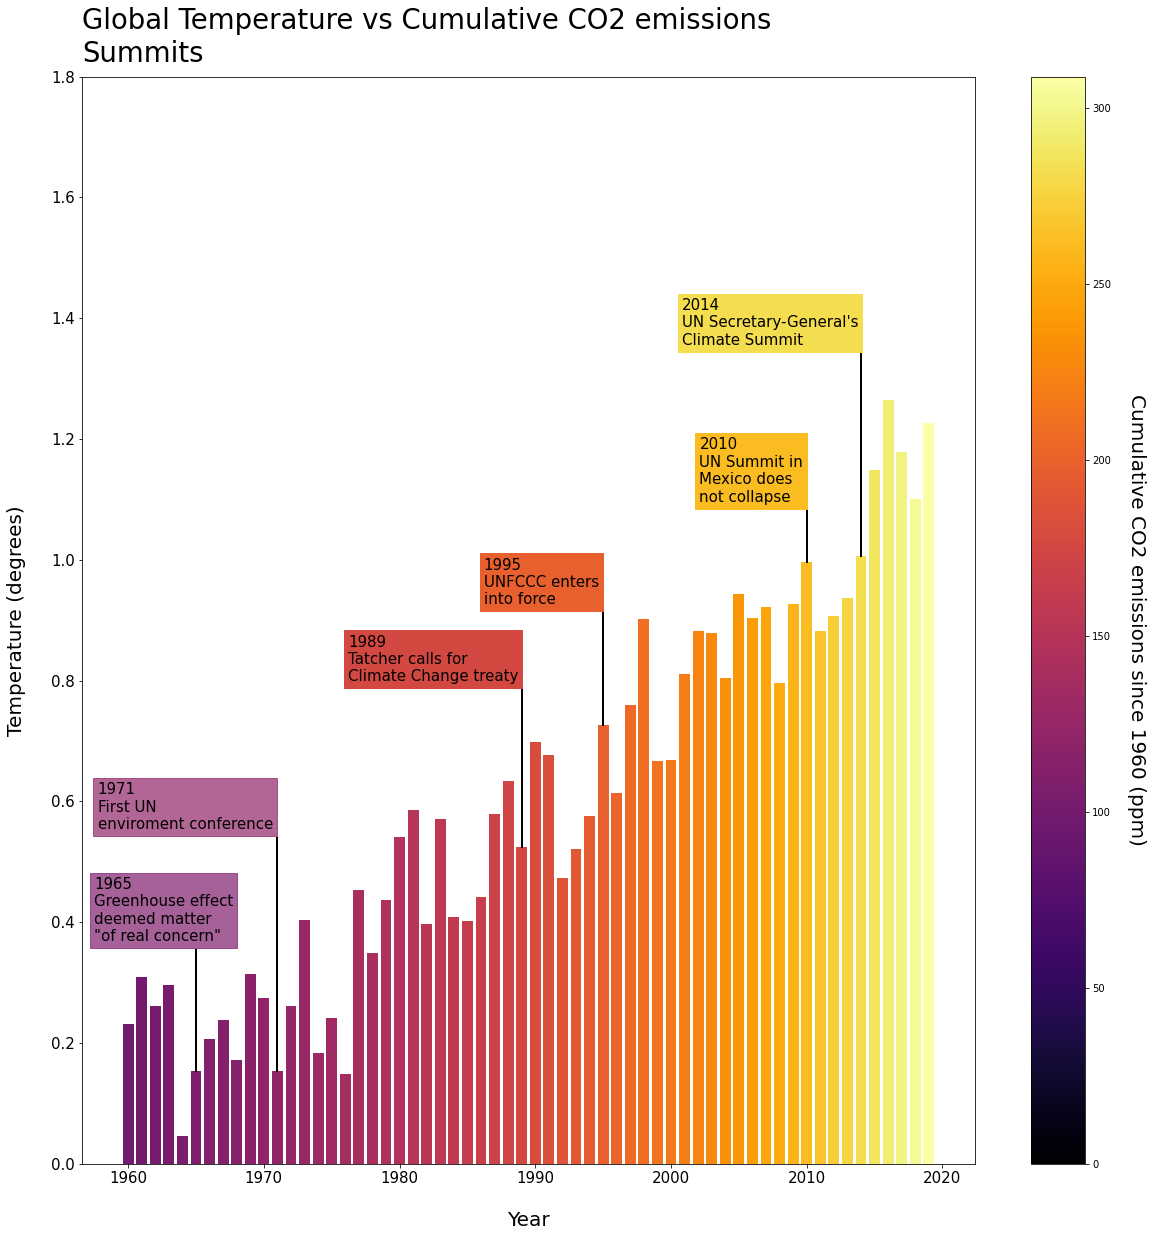

In [43]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_1960, color=colors2)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nSummits", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(1965-7.5, temperatures_1960[117]+0.215, '1965\nGreenhouse effect\ndeemed matter\n"of real concern"', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[5],alpha=0.7))
plt.plot([1965, 1965], [temperatures_1960[117], temperatures_1960[117]+0.2], color='k', linestyle='-', linewidth=2)

ax.text(1971-13.25, temperatures_1960[123]+0.4, '1971\nFirst UN\nenviroment conference', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[11],alpha=0.7))
plt.plot([1971, 1971], [temperatures_1960[123], temperatures_1960[123]+0.385], color='k', linestyle='-', linewidth=2)

ax.text(1989-12.8, temperatures_1960[141]+0.275, '1989\nTatcher calls for\nClimate Change treaty', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[29],alpha=1))
plt.plot([1989, 1989], [temperatures_1960[141], temperatures_1960[141]+0.275], color='k', linestyle='-', linewidth=2)

ax.text(1995-8.8, temperatures_1960[147]+0.2, '1995\nUNFCCC enters\ninto force', color='black', fontsize=15, backgroundcolor=colors2[35],alpha=1)
plt.plot([1995, 1995], [temperatures_1960[147], temperatures_1960[147]+.2], color='k', linestyle='-', linewidth=2)

ax.text(2010-7.9, temperatures_1960[162]+0.1, '2010\nUN Summit in\nMexico does\nnot collapse', color='black', fontsize=15, backgroundcolor=colors2[50],alpha=1)
plt.plot([2010, 2010], [temperatures_1960[162], temperatures_1960[162]+0.1], color='k', linestyle='-', linewidth=2)

ax.text(2014-13.2, temperatures_1960[166]+0.35, '2014\nUN Secretary-General\'s\nClimate Summit', color='black', fontsize=15, backgroundcolor=colors2[54],alpha=1)
plt.plot([2014, 2014], [temperatures_1960[166], temperatures_1960[166]+0.35], color='k', linestyle='-', linewidth=2)

plt.ylim((0,1.8))
plt.show()

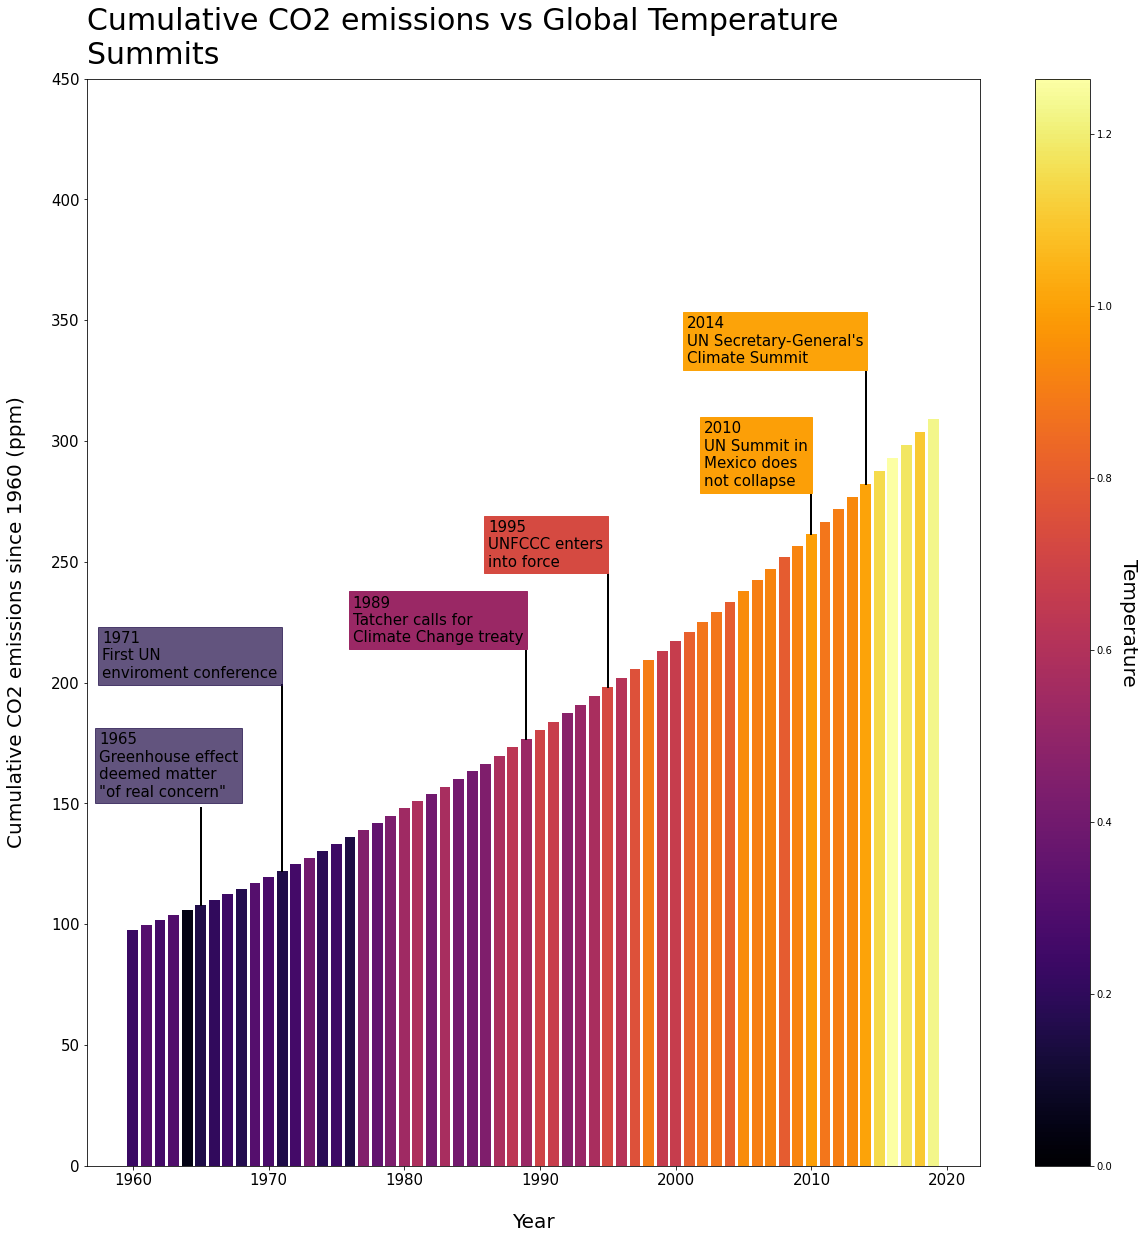

In [44]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, ppms_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(temperatures_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Temperature', rotation=270,labelpad=25,fontsize=20)
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Cumulative CO2 emissions vs Global Temperature\nSummits", fontsize=30, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((0,450))

ax.text(1965-7.5, ppms_1960[117]+45, '1965\nGreenhouse effect\ndeemed matter\n"of real concern"', color='black', fontsize=15, backgroundcolor=to_rgba(colors[5],alpha=0.7))
plt.plot([1965, 1965], [ppms_1960[117], ppms_1960[117]+40], color='k', linestyle='-', linewidth=2)

ax.text(1971-13.25, ppms_1960[123]+80, '1971\nFirst UN\nenviroment conference', color='black', fontsize=15, backgroundcolor=to_rgba(colors[11],alpha=0.7))
plt.plot([1971, 1971], [ppms_1960[123], ppms_1960[123]+77], color='k', linestyle='-', linewidth=2)

ax.text(1989-12.8, ppms_1960[141]+40, '1989\nTatcher calls for\nClimate Change treaty', color='black', fontsize=15, backgroundcolor=to_rgba(colors[29],alpha=1))
plt.plot([1989, 1989], [ppms_1960[141], ppms_1960[141]+40], color='k', linestyle='-', linewidth=2)

ax.text(1995-8.8, ppms_1960[147]+50, '1995\nUNFCCC enters\ninto force', color='black', fontsize=15, backgroundcolor=colors[35],alpha=1)
plt.plot([1995, 1995], [ppms_1960[147], ppms_1960[147]+50], color='k', linestyle='-', linewidth=2)

ax.text(2010-7.9, ppms_1960[162]+20, '2010\nUN Summit in\nMexico does\nnot collapse', color='black', fontsize=15, backgroundcolor=colors[50],alpha=1)
plt.plot([2010, 2010], [ppms_1960[162], ppms_1960[162]+20], color='k', linestyle='-', linewidth=2)

ax.text(2014-13.2, ppms_1960[166]+50, '2014\nUN Secretary-General\'s\nClimate Summit', color='black', fontsize=15, backgroundcolor=colors[54],alpha=1)
plt.plot([2014, 2014], [ppms_1960[166], ppms_1960[166]+50], color='k', linestyle='-', linewidth=2)

plt.show()

###**Ciencia**
#### Descubrimientos/reportes cientificos de gran relevancia
* Wallace Broecker puts the term "global warming" (75)
* NASA expert testifies to U.S. Senate that man-made global warming has begun.(88)
* Science publishes paper warning of collapse of fish stocks by 2048 due to overfishing and pollution (06)
* CO2 concentrations have risen from 315 parts per million (ppm) in 1958 to 380ppm in 2008.(08)
* A series of reviews into "ClimateGate" and the IPCC ask for more openness (10)
* Data shows concentrations of greenhouse gases are rising faster than in previous years. (11)
* The Mauna Loa Observatory on Hawaii reports that the daily mean concentration of CO2 in the atmosphere has surpassed 400 parts per million (ppm) (13)


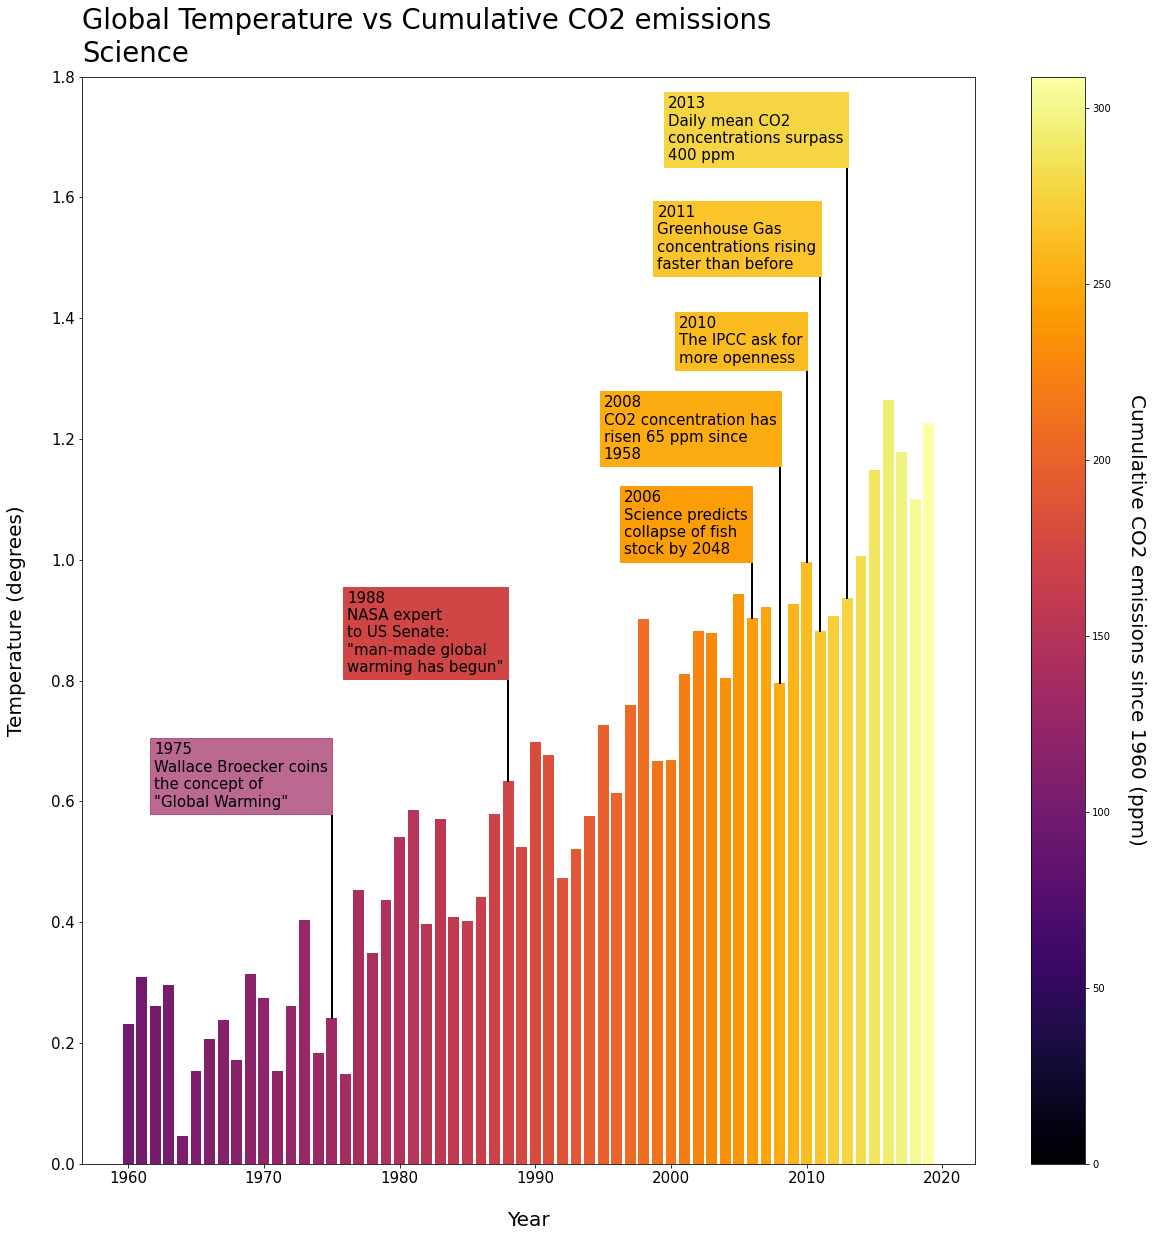

In [45]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_1960, color=colors2)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nScience", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(1975-13.1, temperatures_1960[127]+0.35, '1975\nWallace Broecker coins\nthe concept of\n"Global Warming"', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[15],alpha=0.7))
plt.plot([1975, 1975], [temperatures_1960[127], temperatures_1960[127]+0.335], color='k', linestyle='-', linewidth=2)

ax.text(1988-11.85, temperatures_1960[140]+0.18, '1988\nNASA expert\nto US Senate:\n"man-made global\nwarming has begun"', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[28],alpha=1))
plt.plot([1988, 1988], [temperatures_1960[140], temperatures_1960[140]+0.18], color='k', linestyle='-', linewidth=2)

ax.text(2008-12.95, temperatures_1960[160]+0.37, '2008\nCO2 concentration has\nrisen 65 ppm since\n1958', color='black', fontsize=15, backgroundcolor=colors2[48],alpha=1)
plt.plot([2008, 2008], [temperatures_1960[160], temperatures_1960[160]+.37], color='k', linestyle='-', linewidth=2)

ax.text(2006-9.48, temperatures_1960[158]+0.105, '2006\nScience predicts\ncollapse of fish\nstock by 2048', color='black', fontsize=15, backgroundcolor=colors2[46],alpha=1)
plt.plot([2006, 2006], [temperatures_1960[158], temperatures_1960[158]+.105], color='k', linestyle='-', linewidth=2)

ax.text(2010-9.4, temperatures_1960[162]+0.33, '2010\nThe IPCC ask for\nmore openness', color='black', fontsize=15, backgroundcolor=colors2[50],alpha=1)
plt.plot([2010, 2010], [temperatures_1960[162], temperatures_1960[162]+.33], color='k', linestyle='-', linewidth=2)

ax.text(2011-12, temperatures_1960[163]+0.6, '2011\nGreenhouse Gas\nconcentrations rising\nfaster than before', color='black', fontsize=15, backgroundcolor=colors2[51],alpha=1)
plt.plot([2011, 2011], [temperatures_1960[163], temperatures_1960[163]+.6], color='k', linestyle='-', linewidth=2)

ax.text(2013-13.2, temperatures_1960[165]+0.725, '2013\nDaily mean CO2\nconcentrations surpass\n400 ppm', color='black', fontsize=15, backgroundcolor=colors2[53],alpha=1)
plt.plot([2013, 2013], [temperatures_1960[165], temperatures_1960[165]+.725], color='k', linestyle='-', linewidth=2)

plt.ylim((0,1.8))
plt.show()

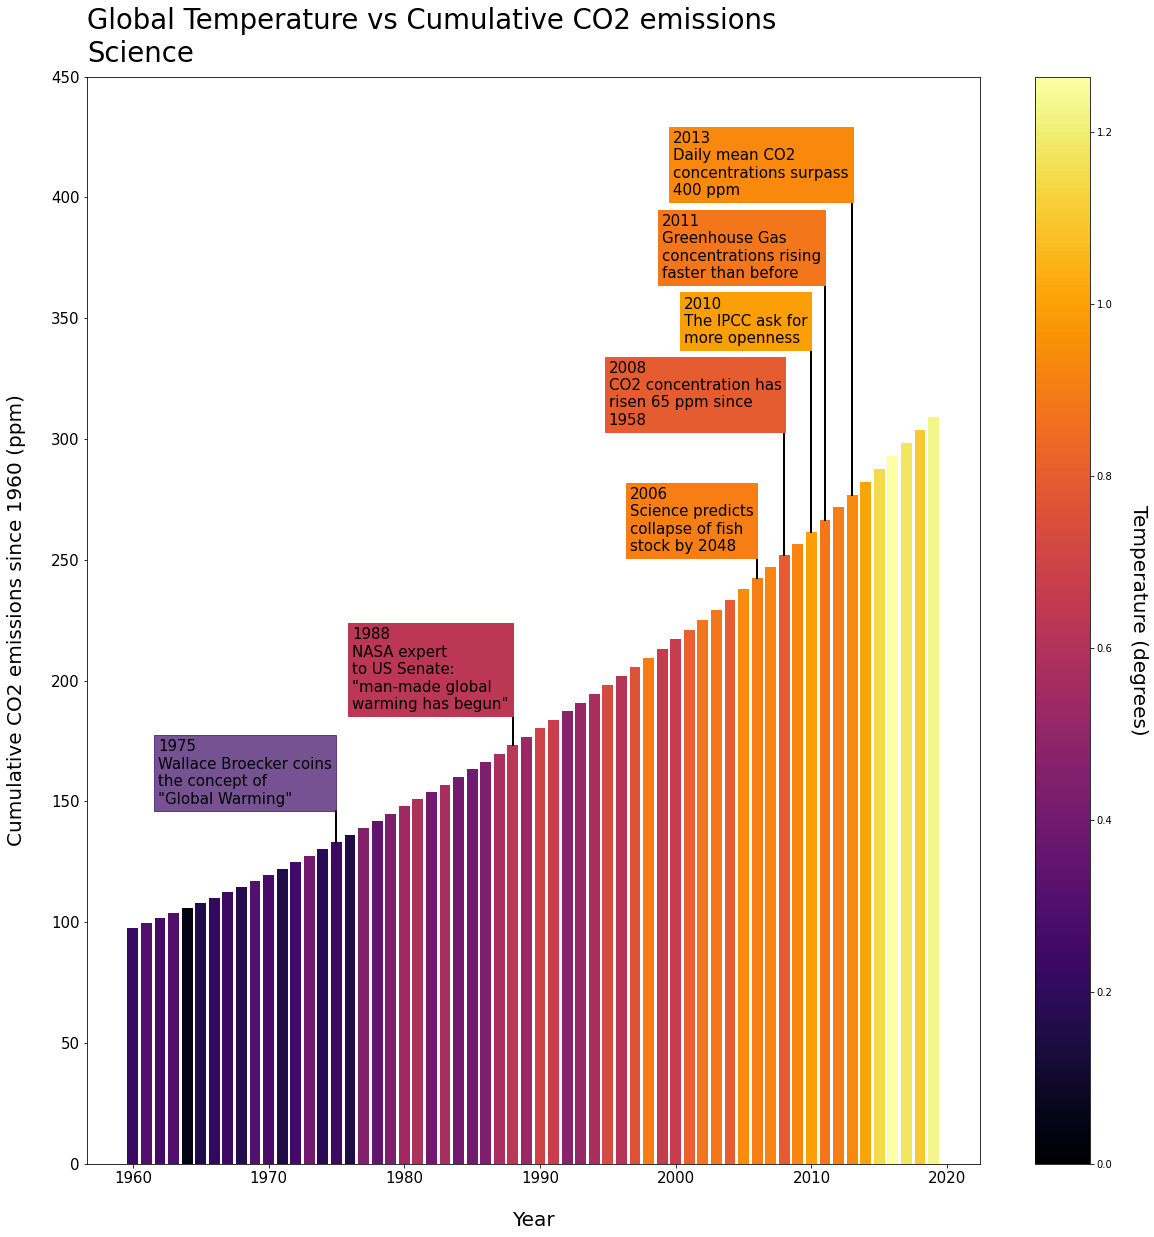

In [50]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, ppms_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(temperatures_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Temperature (degrees)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nScience", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(1975-13.15, ppms_1960[127]+16, '1975\nWallace Broecker coins\nthe concept of\n"Global Warming"', color='black', fontsize=15, backgroundcolor=to_rgba(colors[15],alpha=0.7))
plt.plot([1975, 1975], [ppms_1960[127], ppms_1960[127]+13], color='k', linestyle='-', linewidth=2)

ax.text(1988-11.85, ppms_1960[140]+15, '1988\nNASA expert\nto US Senate:\n"man-made global\nwarming has begun"', color='black', fontsize=15, backgroundcolor=to_rgba(colors[28],alpha=1))
plt.plot([1988, 1988], [ppms_1960[140], ppms_1960[140]+15], color='k', linestyle='-', linewidth=2)

ax.text(2008-12.95, ppms_1960[160]+54, '2008\nCO2 concentration has\nrisen 65 ppm since\n1958', color='black', fontsize=15, backgroundcolor=colors[48],alpha=1)
plt.plot([2008, 2008], [ppms_1960[160], ppms_1960[160]+54], color='k', linestyle='-', linewidth=2)

ax.text(2006-9.4, ppms_1960[158]+11, '2006\nScience predicts\ncollapse of fish\nstock by 2048', color='black', fontsize=15, backgroundcolor=colors[46],alpha=1)
plt.plot([2006, 2006], [ppms_1960[158], ppms_1960[158]+11], color='k', linestyle='-', linewidth=2)

ax.text(2010-9.4, ppms_1960[162]+78, '2010\nThe IPCC ask for\nmore openness', color='black', fontsize=15, backgroundcolor=colors[50],alpha=1)
plt.plot([2010, 2010], [ppms_1960[162], ppms_1960[162]+78], color='k', linestyle='-', linewidth=2)

ax.text(2011-12, ppms_1960[163]+100, '2011\nGreenhouse Gas\nconcentrations rising\nfaster than before', color='black', fontsize=15, backgroundcolor=colors[51],alpha=1)
plt.plot([2011, 2011], [ppms_1960[163], ppms_1960[163]+100], color='k', linestyle='-', linewidth=2)

ax.text(2013-13.2, ppms_1960[165]+124, '2013\nDaily mean CO2\nconcentrations surpass\n400 ppm', color='black', fontsize=15, backgroundcolor=colors[53],alpha=1)
plt.plot([2013, 2013], [ppms_1960[165], ppms_1960[165]+124], color='k', linestyle='-', linewidth=2)

plt.ylim((0,450))
plt.show()

###**Media/Personalities**
#### Eventos mediaticos/nombres propios en la lucha contra el CC
* First Earth Day (00)
* Tony Blair (UK PM) sets Climate Change as priority for his term (05)
* Al Gore receive the Nobel Peace Prize (07)
* Computer hackers download a huge tranche of emails from a server at the University of East Anglia's Climatic Research Unit and release some on the internet, leading to the "ClimateGate" affair. (09)
* Greta Thunberg (18)


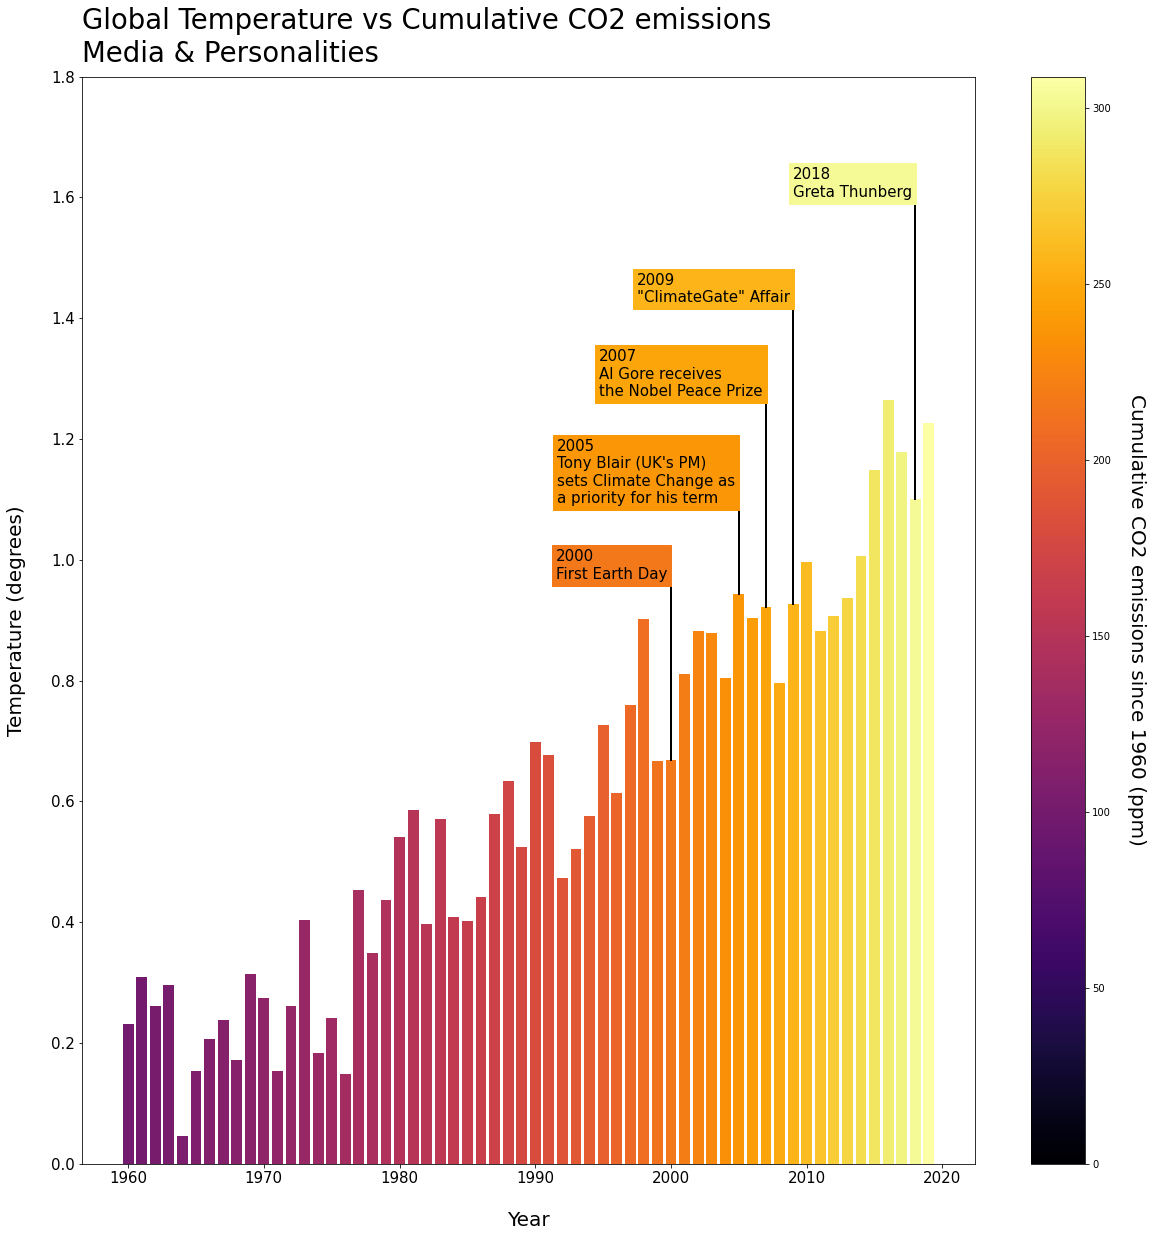

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_1960, color=colors2)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nMedia & Personalities", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(2000-8.5, temperatures_1960[152]+0.30, '2000\nFirst Earth Day', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[40],alpha=1))
plt.plot([2000, 2000], [temperatures_1960[152], temperatures_1960[152]+0.30], color='k', linestyle='-', linewidth=2)

ax.text(2005-13.4, temperatures_1960[157]+0.15, '2005\nTony Blair (UK\'s PM)\nsets Climate Change as\na priority for his term', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[45],alpha=1))
plt.plot([2005, 2005], [temperatures_1960[157], temperatures_1960[157]+0.15], color='k', linestyle='-', linewidth=2)

ax.text(2007-12.3, temperatures_1960[159]+0.35, '2007\nAl Gore receives\nthe Nobel Peace Prize', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[47],alpha=1))
plt.plot([2007, 2007], [temperatures_1960[159], temperatures_1960[159]+0.35], color='k', linestyle='-', linewidth=2)

ax.text(2009-11.5, temperatures_1960[161]+0.5, '2009\n"ClimateGate" Affair', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[49],alpha=1))
plt.plot([2009, 2009], [temperatures_1960[161], temperatures_1960[161]+0.5], color='k', linestyle='-', linewidth=2)

ax.text(2018-9, temperatures_1960[170]+0.5, '2018\nGreta Thunberg', color='black', fontsize=15, backgroundcolor=to_rgba(colors2[58],alpha=1))
plt.plot([2018, 2018], [temperatures_1960[170], temperatures_1960[170]+0.5], color='k', linestyle='-', linewidth=2)

plt.ylim((0,1.8))
plt.show()

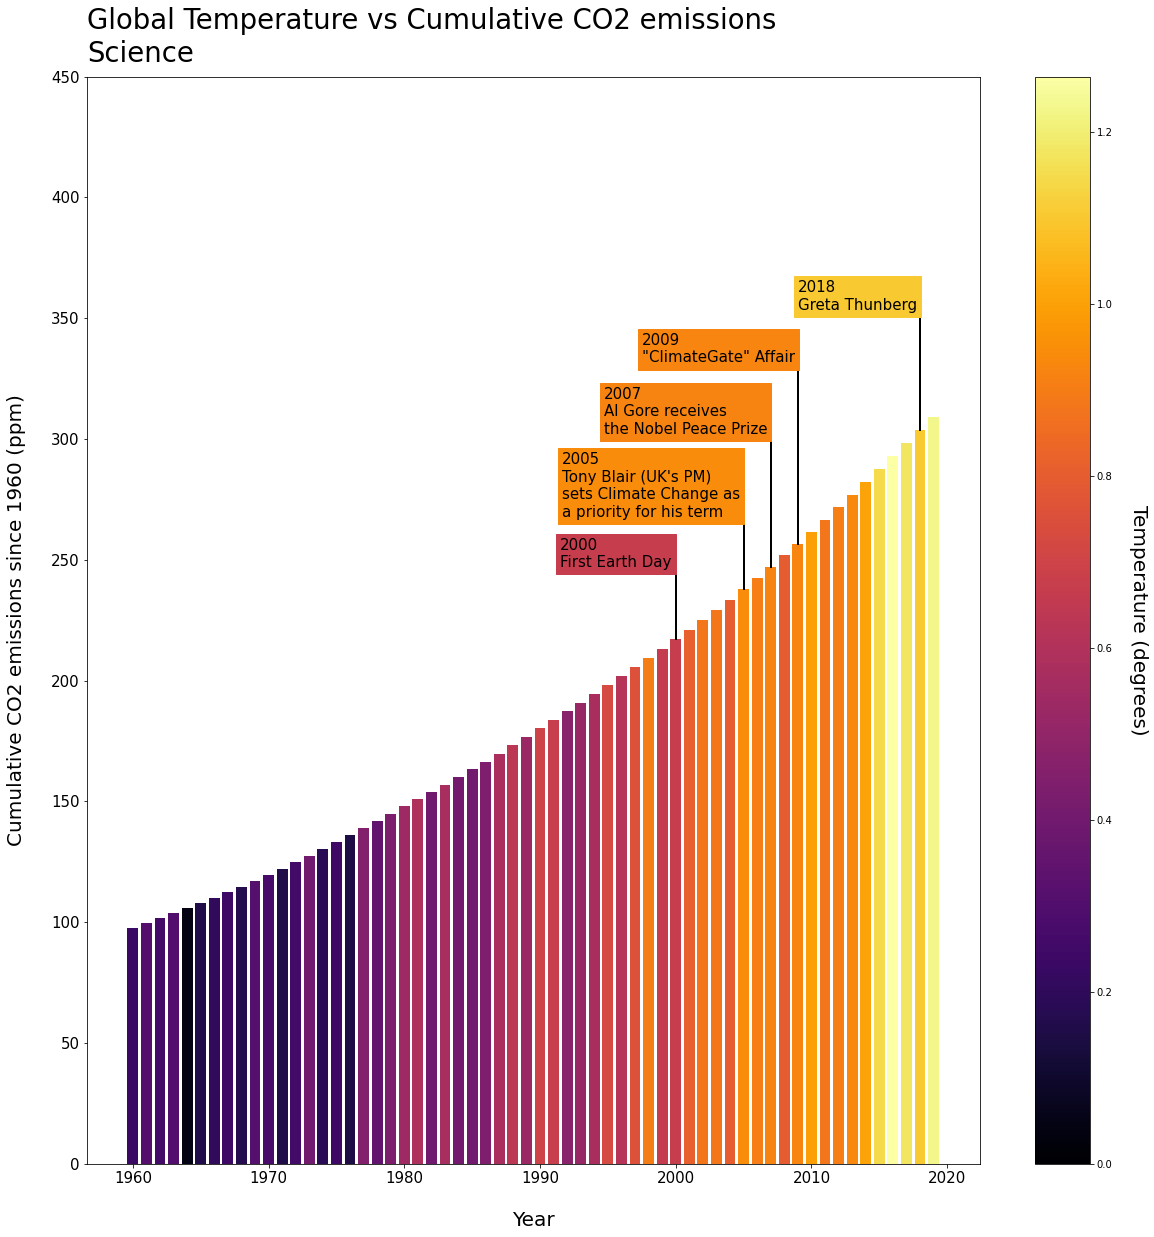

In [51]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, ppms_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(temperatures_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Temperature (degrees)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Cumulative CO2 emissions since 1960 (ppm)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nScience", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(2000-8.5, ppms_1960[152]+30, '2000\nFirst Earth Day', color='black', fontsize=15, backgroundcolor=to_rgba(colors[40],alpha=1))
plt.plot([2000, 2000], [ppms_1960[152], ppms_1960[152]+30], color='k', linestyle='-', linewidth=2)

ax.text(2005-13.4, ppms_1960[157]+30, '2005\nTony Blair (UK\'s PM)\nsets Climate Change as\na priority for his term', color='black', fontsize=15, backgroundcolor=to_rgba(colors[45],alpha=1))
plt.plot([2005, 2005], [ppms_1960[157], ppms_1960[157]+30], color='k', linestyle='-', linewidth=2)

ax.text(2007-12.3, ppms_1960[159]+55, '2007\nAl Gore receives\nthe Nobel Peace Prize', color='black', fontsize=15, backgroundcolor=to_rgba(colors[47],alpha=1))
plt.plot([2007, 2007], [ppms_1960[159], ppms_1960[159]+55], color='k', linestyle='-', linewidth=2)

ax.text(2009-11.5, ppms_1960[161]+75, '2009\n"ClimateGate" Affair', color='black', fontsize=15, backgroundcolor=to_rgba(colors[49],alpha=1))
plt.plot([2009, 2009], [ppms_1960[161], ppms_1960[161]+75], color='k', linestyle='-', linewidth=2)

ax.text(2018-9, ppms_1960[170]+50, '2018\nGreta Thunberg', color='black', fontsize=15, backgroundcolor=to_rgba(colors[58],alpha=1))
plt.plot([2018, 2018], [ppms_1960[170], ppms_1960[170]+50], color='k', linestyle='-', linewidth=2)

plt.ylim((0,450))
plt.show()

###**Tendencias Al Alza**
#### Eventos que se dieron antes o poco antes del comienzo de tendencias al alza
* President George W Bush removes the US from the Kyoto process (01)
* A US President's Advisory Committee panel warns that the greenhouse effect is a matter of "real concern". (65)
* Wallace Broecker puts the term "global warming" (75)
* 1st Earth Day (00)
* Montreal protocol (87)




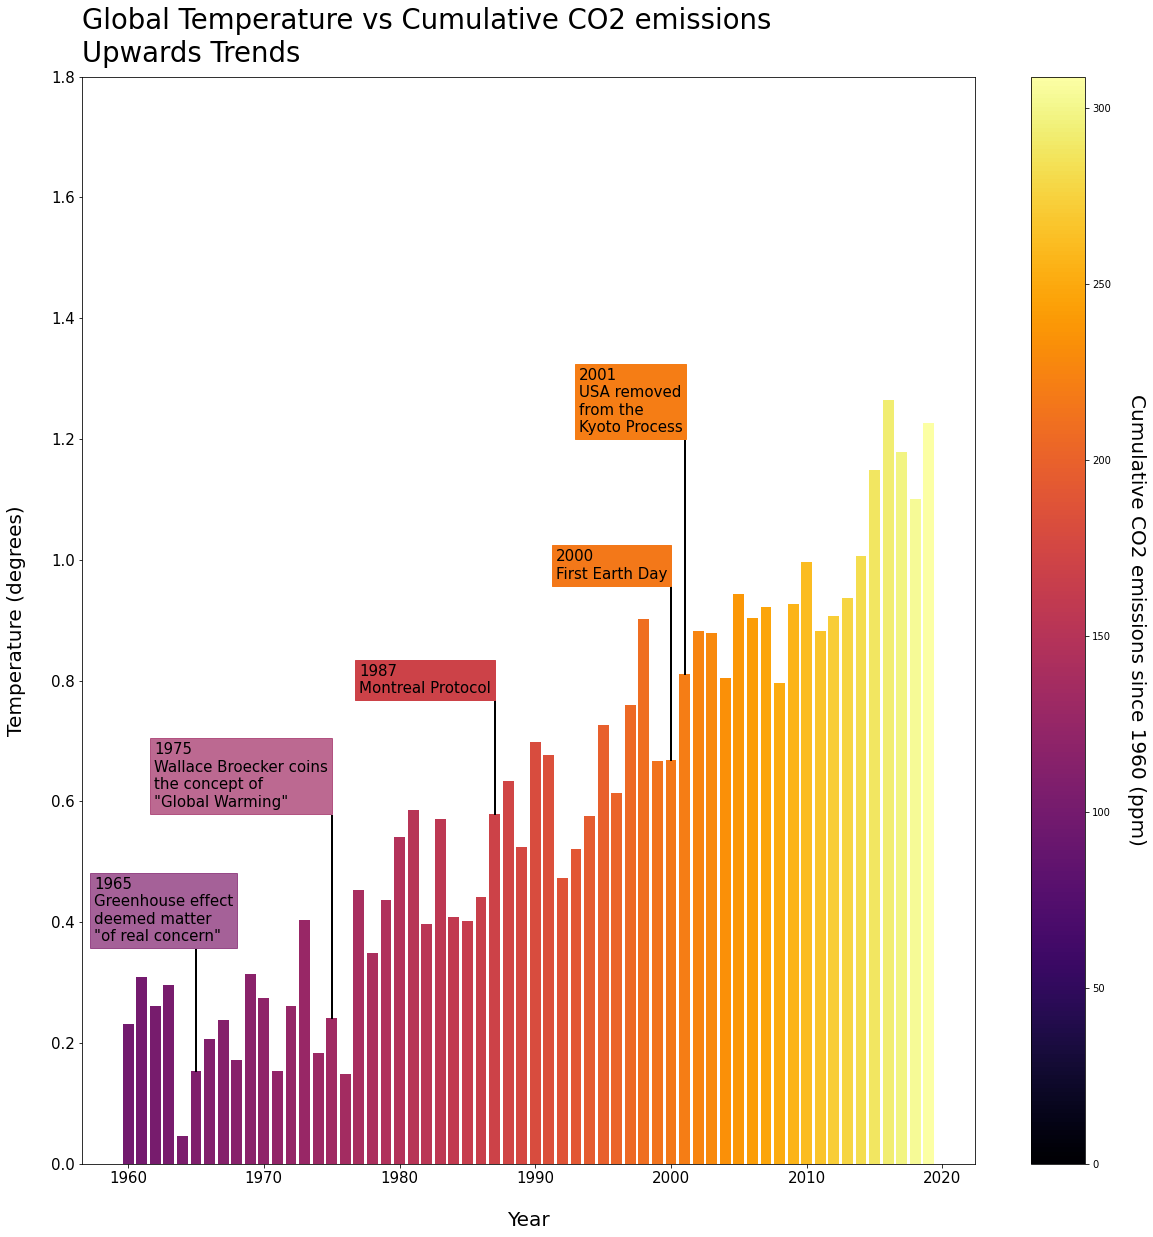

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.bar(years_1960, temperatures_1960, color=colors)
sm = ScalarMappable(cmap=my_cmap2, norm=plt.Normalize(0,max(ppms_1960)))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Cumulative CO2 emissions since 1960 (ppm)', rotation=270,labelpad=35,fontsize=20)
plt.ylabel("Temperature (degrees)",fontsize=20, labelpad=25)
plt.xlabel("Year",fontsize=20, labelpad=25)
plt.title("Global Temperature vs Cumulative CO2 emissions\nUpwards Trends", fontsize=27.5, loc='left', pad=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.text(1987-10, temperatures_1960[139]+0.2, '1987\nMontreal Protocol', color='black', fontsize=15, backgroundcolor=to_rgba(colors[27],alpha=1))
plt.plot([1987, 1987], [temperatures_1960[139], temperatures_1960[139]+0.2], color='k', linestyle='-', linewidth=2)

ax.text(2001-7.8, temperatures_1960[153]+0.4, '2001\nUSA removed\nfrom the\nKyoto Process', color='black', fontsize=15, backgroundcolor=colors[41],alpha=1)
plt.plot([2001, 2001], [temperatures_1960[153], temperatures_1960[153]+0.4], color='k', linestyle='-', linewidth=2)

ax.text(1965-7.5, temperatures_1960[117]+0.215, '1965\nGreenhouse effect\ndeemed matter\n"of real concern"', color='black', fontsize=15, backgroundcolor=to_rgba(colors[5],alpha=0.7))
plt.plot([1965, 1965], [temperatures_1960[117], temperatures_1960[117]+0.2], color='k', linestyle='-', linewidth=2)

ax.text(1975-13.1, temperatures_1960[127]+0.35, '1975\nWallace Broecker coins\nthe concept of\n"Global Warming"', color='black', fontsize=15, backgroundcolor=to_rgba(colors[15],alpha=0.7))
plt.plot([1975, 1975], [temperatures_1960[127], temperatures_1960[127]+0.335], color='k', linestyle='-', linewidth=2)

ax.text(2000-8.5, temperatures_1960[152]+0.30, '2000\nFirst Earth Day', color='black', fontsize=15, backgroundcolor=to_rgba(colors[40],alpha=1))
plt.plot([2000, 2000], [temperatures_1960[152], temperatures_1960[152]+0.30], color='k', linestyle='-', linewidth=2)

plt.ylim((0,1.8))
plt.show()




